# Practical Statistics for Data Scientists
## Chapter 1


Data : https://www.kaggle.com/datasets/nextmillionaire/pizza-sales-dataset/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from statistics import variance,stdev

In [3]:
pizza_df = pd.read_csv('Data\\pizza_sales.csv')
pizza_df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## Estimates of Location

In [4]:
pizza_df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [5]:
# Mean
pizza_df['total_price'].mean()

16.821473673385437

In [6]:
# Weighted Mean
np.average(pizza_df['total_price'],weights=pizza_df['quantity'])

17.158908903860894

In [7]:
# Trimmed Mean
trim_mean(pizza_df['total_price'],0.1)

16.6015914232826

In [8]:
# Median
pizza_df['total_price'].median()

16.5

In [9]:
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]
weighted_median(pizza_df,'total_price','quantity')

16.5

## Estimates of Variability

In [10]:
#Variance
variance(pizza_df['total_price'])

19.69049729347173

In [11]:
# Standard deviation
stdev(pizza_df['total_price'])

4.4373975811810835

In [12]:
# Mean Absolute Deviation
np.mean(np.absolute(pizza_df['total_price'] - np.mean(pizza_df['total_price'])))

3.274931013453843

In [13]:
# Median absolute deviation
np.median(np.absolute(pizza_df['total_price'] - np.median(pizza_df['total_price']))) 

4.0

In [14]:
# 75 Percentile
q3 = np.percentile(pizza_df['total_price'], 75)
q3

20.5

In [15]:
# Interquartile Range
q1,q3 = np.percentile(pizza_df['total_price'], [25,75])
iqr = q3 - q1
iqr

7.75

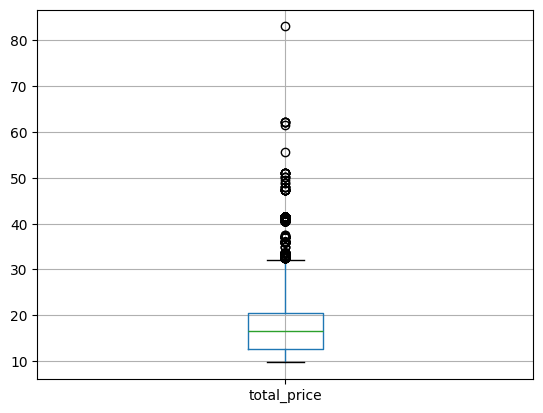

In [16]:
fig, ax = plt.subplots()
pizza_df.boxplot(column='total_price',by=None,ax=ax)
plt.show()

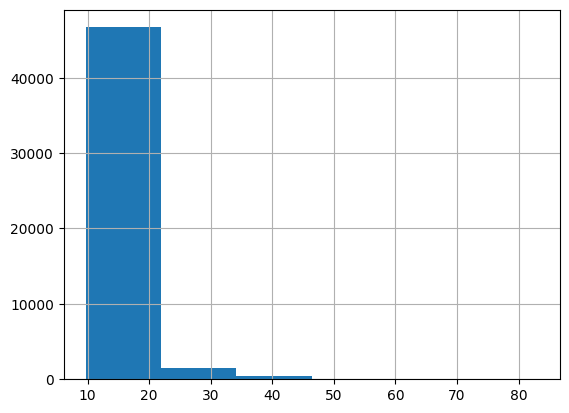

In [17]:
pizza_df['total_price'].hist(bins=6)
plt.show()

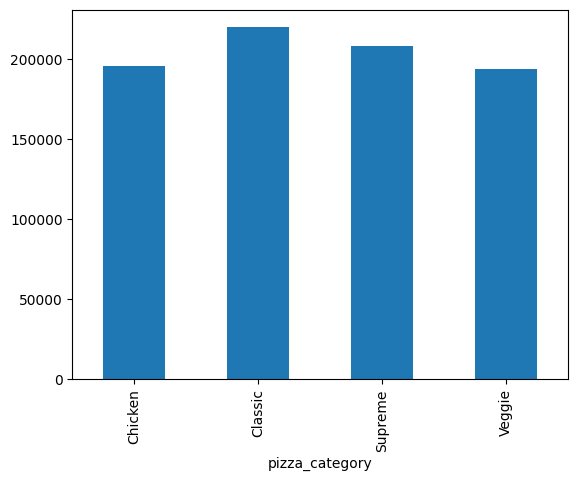

In [23]:
pizza_df.groupby('pizza_category')['total_price'].sum().plot.bar(x='pizza_category',y='total_price')
plt.show()

In [24]:
pizza_df['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

(48620, 12)